In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def f(x):
  return 3*x**2 -4*x + 5

In [6]:
f(3)

20

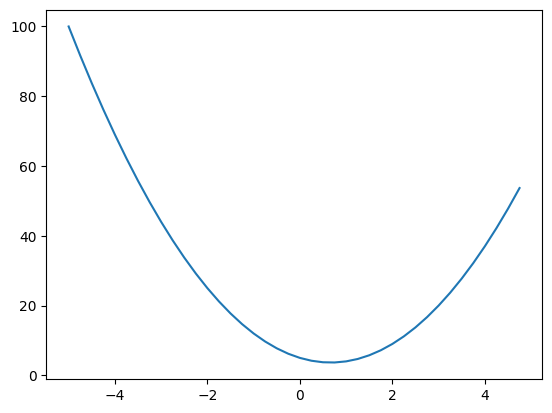

In [8]:
xs = np.arange(-5 , 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)
plt.show()


In [9]:
h=0.00000001
x=2/3
(f(x+h)-f(x))/h

0.0

In [10]:
a=3
b=-3
c=21
d =a*b +c
print(d)




12


In [11]:
h=0.0000001

#inputs
a=3
b=-3
c=21
d1 =a*b +c
a=+h
d2=a*b +c
print("d1",d1)
print("d2",d2)
print("slope",(d2-d1)/h)

d1 12
d2 20.9999997
slope 89999997.0


In [12]:
class Value:
  def __init__(self, data,_children=(),_op='', label=''):
    self.data = data
    self._prev = set(_children)
    self._backward=lambda: None
    self._op=_op
    self.label=label
    self.grad=0.0




  def __repr__(self) :
    return f"Value(data={self.data})"

  def __add__(self , other):
    #other =other if isinstance (other, Value) else Value (other)
    out=Value(self.data + other.data,(self,other),'+')


    def _backward():
      self.grad+=1.0*out.grad
      other.grad+=1.0*out.grad
    out._backward=_backward
    return out
  def __rmul__ (self ,other):
    return self * other
  def __mul__(self , other):
    other =other if isinstance (other, Value) else Value (other)
    out=Value(self.data * other.data,(self,other),'*')

    def _backward():
      self.grad+=other.data*out.grad
      other.grad+=self.data*out.grad
    out._backward=_backward
    return out
  def tanh(self):
    x= self.data
    t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(t,(self,),'tanh')

    def _backward():
      self.grad+=(1-t**2)*out.grad
    out._backward=_backward
    return out

  def backward(self):

    topo =[]
    visited=set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad=1.0

    for node in reversed(topo):
      node._backward()


a=Value(2.0,label='a')
b=Value(-3.0,label='b')
c=Value(10.0,label='c')
e=a*b;e.label='e'
d=e+c;d.label='d'
f=Value(-2.0,label='f')
L=d*f ; L.label='L'
L





Value(data=-8.0)

In [13]:
a=Value(2.0, label='a')
a=a+1
a
a*2

AttributeError: 'int' object has no attribute 'data'

In [28]:
import os 
os.environ["PATH"] += os.pathsep+'C:/Program Files/Graphviz/bin'

In [29]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f|grad %.4f  }" % (n.label, n.data,n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

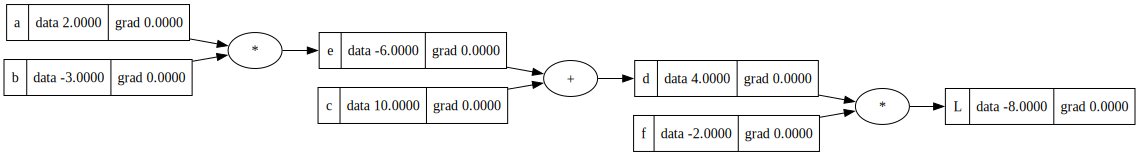

In [30]:
draw_dot(L)

In [17]:
# inputs x1,x2
x1 =Value (2.0, label='x1')
x2 =Value(0.0, label='x2')
#weights w1,w2
w1 =Value (-3.0, label='w1')
w2= Value (1.0, label='w2')
# bias of the neuron
b=Value(6.7, label='b')
# x1*w1 + x2*w2 + b
x1w1= x1*w1; x1w1. label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2= x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*W2'
n = x1w1x2w2 +b; n. label = 'n'
o= n.tanh();o.label='o'


In [18]:
draw_dot(o)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [19]:
o.backward()

In [20]:
a= Value  (-2.0,label='a')
b= Value  (3.0,label='b')
c=a*b ;c.label='c'
d=a+b ;d.label='d'
e=c*d ;e.label='e'
e.backward()
draw_dot(e)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH